In [1]:
#Import libraires 
import pandas as pd
from pathlib import Path
import hvplot.pandas
%matplotlib inline

In [2]:
#Read in SP500 Csv File
sp500_data_path = Path('C:/Users/Optiplex7040/SP500_Close - Sheet4.csv')
sp500_df = pd.read_csv(sp500_data_path, index_col='Date', parse_dates=True)
sp500_df.head()

,Close
Date,
2024-01-01,"4,783.83"
2023-01-01,"4,769.83"
2022-01-01,"3,839.50"
2021-01-01,"4,766.18"
2020-01-01,"3,756.07"


In [3]:
#Fix SP500 csv data types
sp500_df["Close"] = sp500_df["Close"].str.replace(",", "") 
sp500_df["Close"] = sp500_df["Close"].astype("float") 
sp500_df.dtypes

Close    float64
dtype: object

In [4]:
sp500_df.head()

,Close
Date,
2024-01-01,4783.83
2023-01-01,4769.83
2022-01-01,3839.50
2021-01-01,4766.18
2020-01-01,3756.07


In [5]:
#Read in Nas100 Csv File
nasdaq_data_path = Path('C:/Users/Optiplex7040/Nasdaq_Close - Sheet4.csv')
nas100_df = pd.read_csv(nasdaq_data_path, index_col='Date', parse_dates=True)
nas100_df.head()

,Close
Date,
2023-01-01,"13,271.32"
2022-01-01,"10,466.48"
2021-01-01,"15,644.97"
2020-01-01,"12,888.28"
2019-01-01,"8,972.61"


In [6]:
#Fix Nas100 csv data types
nas100_df["Close"] = nas100_df["Close"].str.replace(",", "") 
nas100_df["Close"] = nas100_df["Close"].astype("float") 
nas100_df.dtypes

Close    float64
dtype: object

In [7]:
nas100_df.head()

,Close
Date,
2023-01-01,13271.32
2022-01-01,10466.48
2021-01-01,15644.97
2020-01-01,12888.28
2019-01-01,8972.61


In [8]:
#Read in Dow Jones Csv File
dow_data_path = Path('C:/Users/Optiplex7040/Dow_Close - Sheet2.csv')
dow_df = pd.read_csv(dow_data_path, index_col='Date', parse_dates=True)
dow_df.head()

,Close
Date,
2024-01-01,"37,592.98"
2023-01-01,"37,689.54"
2022-01-01,"33,147.25"
2021-01-01,"36,338.30"
2020-01-01,"30,606.48"


In [9]:
#Fix Dow Jones csv data types
dow_df["Close"] = dow_df["Close"].str.replace(",", "") 
dow_df["Close"] = dow_df["Close"].astype("float") 
dow_df.dtypes

Close    float64
dtype: object

In [10]:
dow_df.head()

,Close
Date,
2024-01-01,37592.98
2023-01-01,37689.54
2022-01-01,33147.25
2021-01-01,36338.30
2020-01-01,30606.48


In [11]:
#Combine Sp500, Nas100, and Dow Jones into a single dataframe
stock_df = pd.concat([sp500_df, nas100_df, dow_df], axis='columns', join='inner')
stock_df.head()

,Close,Close,Close
Date,,,
2023-01-01,4769.83,13271.32,37689.54
2022-01-01,3839.50,10466.48,33147.25
2021-01-01,4766.18,15644.97,36338.30
2020-01-01,3756.07,12888.28,30606.48
2019-01-01,3230.78,8972.61,28538.44


In [12]:
#Rename columns
columns = ["SP500_Close", "Nas100_Close", "Dow_Close"]
stock_df.columns = columns
stock_df.head()

,SP500_Close,Nas100_Close,Dow_Close
Date,,,
2023-01-01,4769.83,13271.32,37689.54
2022-01-01,3839.50,10466.48,33147.25
2021-01-01,4766.18,15644.97,36338.30
2020-01-01,3756.07,12888.28,30606.48
2019-01-01,3230.78,8972.61,28538.44


<Axes: xlabel='Date'>

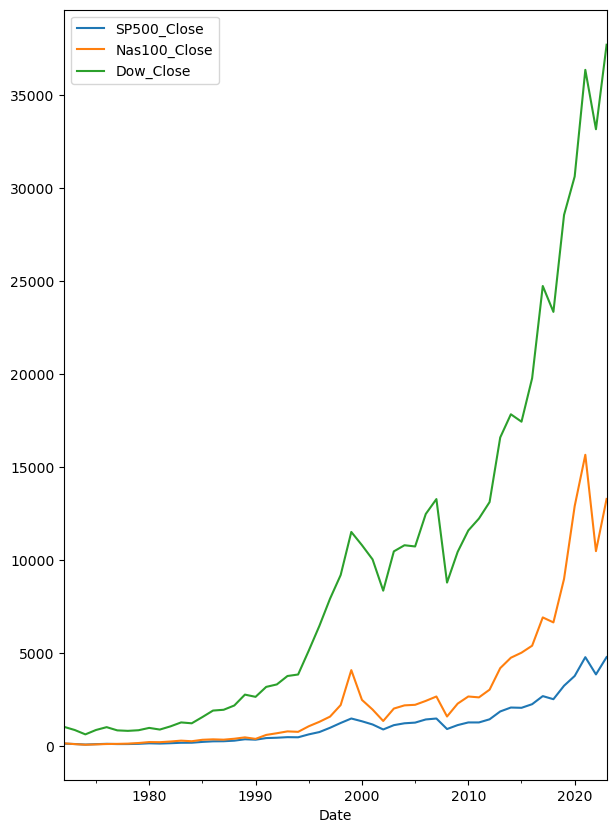

In [13]:
#Create a line graph ploting the closing prices of each index
stock_df.plot(figsize=(7,10))

In [14]:
#Compare indicies by making a separate bar graph of each index using Hvplot
#SP500 bar graph
sp500_df.hvplot.bar(label="Close", rot= 90,  color='black', hover_color="blue").opts(yformatter='%.0f') 

:Bars   [Date]   (Close)

In [15]:
#Nas100 bar graph
nas100_df.hvplot.bar(label="Close", rot= 90,  color='black', hover_color="blue").opts(yformatter='%.0f')

:Bars   [Date]   (Close)

In [16]:
#Dow Jones bar graph
dow_df.hvplot.bar(label="Close", rot= 90,  color='black', hover_color="blue").opts(yformatter='%.0f')

:Bars   [Date]   (Close)

In [17]:
#All indicies combined onto one bar graph for comparison 
#Dow Jones = Blue, Nas100 = Red, SP500 = Yellow
dow_df.hvplot.bar(label="Close", rot=90) * nas100_df.hvplot.bar(label="Close", rot=90) * sp500_df.hvplot.bar(label="Close", rot=90)

:Overlay
   .Bars.Close.I   :Bars   [Date]   (Close)
   .Bars.Close.II  :Bars   [Date]   (Close)
   .Bars.Close.III :Bars   [Date]   (Close)

<Axes: >

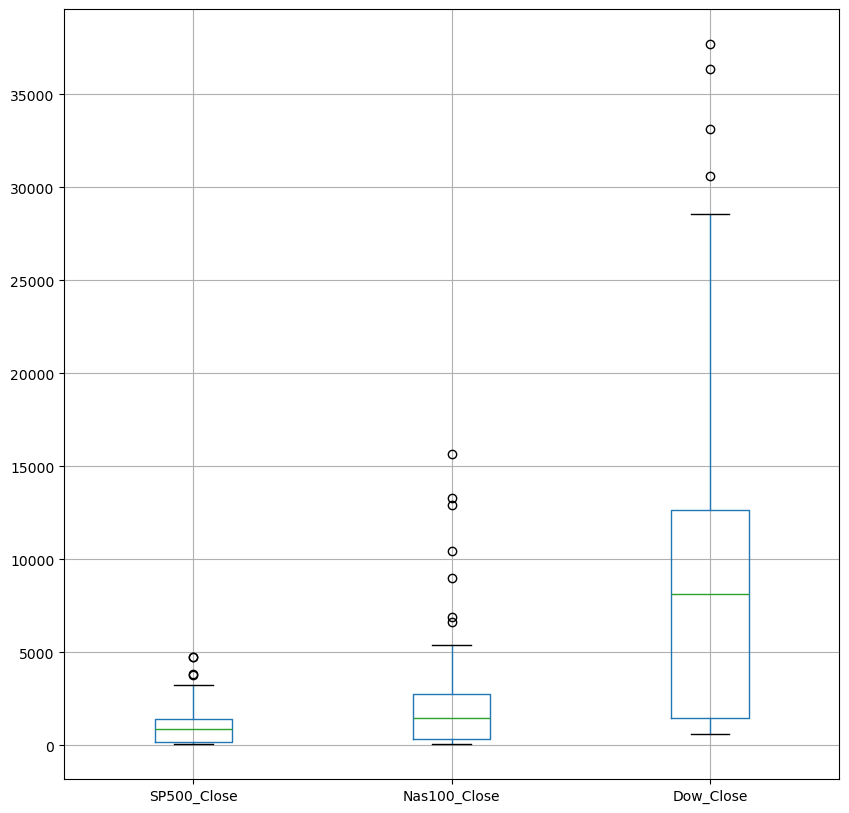

In [18]:
#Create a box plot to visually show risk associated with each index
stock_df.boxplot(column=['SP500_Close', 'Nas100_Close', 'Dow_Close'], figsize=(10,10))